# Notebook to process k27ac
Please launch `~/work/washu/analysis/chipseq_diff.sh` beforehand!

In [29]:
%matplotlib inline
%run ~/work/washu/bed/metabed.py
import matplotlib.pyplot as plt

In [30]:
import os
PEAKS_FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/k27ac_bams_macs_broad_0.01'
PEAKS_NAMES={
    'OD4': 'OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak',
    'OD5': 'OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak',
    'OD6': 'OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak',
    'YD1': 'YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak',
    'YD2': 'YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak',
    'YD3': 'YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak'
}
PEAKS={}
for id, filename in PEAKS_NAMES.items():
    PEAKS[id] = Bed(os.path.join(PEAKS_FOLDER, filename))
for n,p in PEAKS.items():
    print(n, str(p))

OD5 OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak
YD2 YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak
OD6 OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak
OD4 OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak
YD1 YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak
YD3 YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak


# Metabed intersection

In [55]:
YD1=PEAKS['YD1']
YD2=PEAKS['YD2']
YD3=PEAKS['YD3']
print(YD1.count())
print(YD2.count())
print(YD3.count())
YD=intersect(YD1, YD2, YD3)
print('YD', YD.count())
OD4=PEAKS['OD4']
OD5=PEAKS['OD5']
OD6=PEAKS['OD6']
print(OD4.count())
print(OD5.count())
print(OD6.count())
OD=intersect(OD4, OD5, OD6)
print('OD', OD.count())

print('YD and OD', intersect(YD, OD).count())
print('YD - OD', minus(YD, OD).count())
print('OD - YD', minus(OD, YD).count())

26102
28230
24739
YD 18279
26644
36080
29672
OD 21104
YD and OD 16185
YD - OD 1159
OD - YD 4708


In [43]:
print('YD123', intersect(YD1, YD2, YD3).count())
print('YD213', intersect(YD2, YD1, YD3).count())
print('YD312', intersect(YD3, YD1, YD2).count())

YD123 18279
YD213 18279
YD312 18279


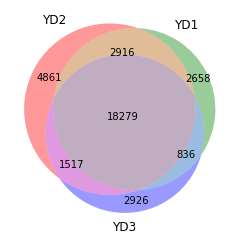

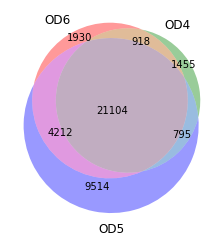

In [33]:
metapeaks({'YD1': YD1, 'YD2': YD2, 'YD3': YD3})
plt.show()
metapeaks({'OD4': OD4, 'OD5': OD5, 'OD6': OD6})
plt.show()

## Intersection based

In [50]:
YD=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/\
diff/diff_k27ac_Y_O_intersection/Y_peaks_0.01.bed')
OD=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/\
diff/diff_k27ac_Y_O_intersection/O_peaks_0.01.bed')
print(YD.count())
print(OD.count())
print('YD and OD', intersect(YD, OD).count())
print('YD - OD', minus(YD, OD).count())
print('OD - YD', minus(OD, YD).count())

YD_inter=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/\
diff/diff_k27ac_Y_O_intersection/diff_k27ac_Y_O_0.01_cond1.bed')
OD_inter=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/\
diff/diff_k27ac_Y_O_intersection/diff_k27ac_Y_O_0.01_cond2.bed')
print('YD exclusive', YD_inter.count())
print('OD exclusive', OD_inter.count())

18258
21076
YD and OD 16164
YD - OD 1159
OD - YD 4702
YD exclusive 1159
OD exclusive 4702


# Intersection vs pooled peaks

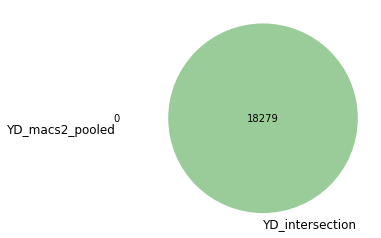

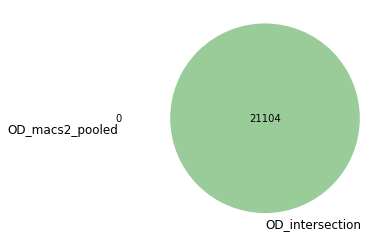

In [59]:
YD_macs_pooled=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/\
diff/diff_k27ac_Y_O_macs_pooled/diff_k27ac_Y_O_1_macs2_broad_0.01_peak.broadPeak')
OD_macs_pooled=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/\
diff/diff_k27ac_Y_O_macs_pooled/diff_k27ac_Y_O_2_macs2_broad_0.01_peak.broadPeaks')

metapeaks({'YD_intersection': YD, 'YD_macs2_pooled': YD_macs_pooled})
plt.show()
metapeaks({'OD_intersection': OD, 'OD_macs2_pooled': OD_macs_pooled})
plt.show()

## MACS2 pooled bdgdiff

In [38]:
YD_bdgdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_bdgdiff/diff_k27ac_Y_O_0.01_c3.0_cond1.bed')
OD_bdgdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_bdgdiff/diff_k27ac_Y_O_0.01_c3.0_cond1.bed')
YD_and_OD_bdgdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_bdgdiff/diff_k27ac_Y_O_0.01_c3.0_common.bed')

print('YD and OD', YD_and_OD_bdgdiff.count())
print('YD exclusive', YD_bdgdiff.count())
print('OD exclusive', OD_bdgdiff.count())

YD and OD 24701
YD exclusive 429
OD exclusive 429


## MACS2 pooled with Y vs O as control

In [39]:
YD_pooled_control=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_pooled_1_vs_2/diff_k27ac_Y_O_1_vs_2_0.01_peaks.broadPeak')
OD_pooled_control=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_macs_pooled_1_vs_2/diff_k27ac_Y_O_2_vs_1_0.01_peaks.broadPeak')
print('YD exclusive', YD_pooled_control.count())
print('OD exclusive', OD_pooled_control.count())

YD exclusive 1979
OD exclusive 11038


## ChIPDIFF

In [40]:
YD_chipdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_chipdiff/diff_k27ac_Y_O_3_cond1.bed')
OD_chipdiff=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_chipdiff/diff_k27ac_Y_O_3_cond2.bed')
print('YD exclusive', YD_chipdiff.count())
print('OD exclusive', OD_chipdiff.count())

YD exclusive 50
OD exclusive 44


## DiffBIND

In [41]:
YD_diffbind=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_diffbind/diffbind_Y_O_cond1.bed')
OD_diffbind=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/diff/\
diff_k27ac_Y_O_diffbind/diffbind_Y_O_cond2.bed')
print('YD exclusive', YD_diffbind.count())
print('OD exclusive', OD_diffbind.count())

YD exclusive 499
OD exclusive 3381


# Check differential peaks consistency

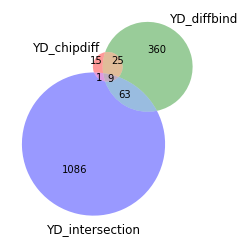

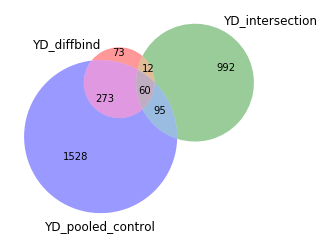

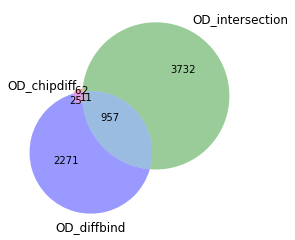

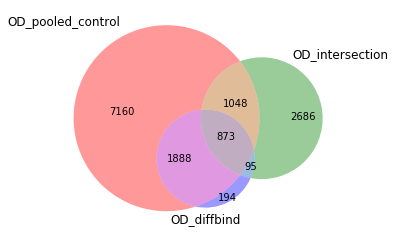

In [56]:
metapeaks({'YD_intersection': YD_inter, 'YD_diffbind': YD_diffbind, 'YD_chipdiff': YD_chipdiff})
plt.show()
metapeaks({'YD_intersection': YD_inter, 'YD_diffbind': YD_diffbind, 'YD_pooled_control': YD_pooled_control})
plt.show()

metapeaks({'OD_intersection': OD_inter, 'OD_diffbind': OD_diffbind, 'OD_chipdiff': OD_chipdiff})
plt.show()
metapeaks({'OD_intersection': OD_inter, 'OD_diffbind': OD_diffbind, 'OD_pooled_control': OD_pooled_control})
plt.show()

# Fuckplot (c) Roman

In [44]:
import pandas as pd
db = pd.read_csv('/Users/oleg/Desktop/k27ac_diffbind.csv')
db

,SampleID,Tissue,Factor,Condition,Treatment,Replicate,bamReads,ControlID,bamControl,Peaks,PeakCaller
0,YD_1,CD14,Age,Y,NaN,1,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,YD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
1,YD_2,CD14,Age,Y,NaN,2,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,YD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
2,YD_3,CD14,Age,Y,NaN,3,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,YD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
3,OD_4,CD14,Age,O,NaN,1,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,OD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
4,OD_5,CD14,Age,O,NaN,2,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,OD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs
5,OD_6,CD14,Age,O,NaN,3,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,OD_pooled,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10...,macs


In [45]:
YDS=[]
for index, row in db[db['Condition'] == 'Y'].iterrows():
    peaks = row['Peaks'].replace('.xls', '.broadPeak')
    YDS.append(Bed(peaks))
print('\n'.join([str(x) + ' ' + str(x.count()) for x in YDS]))

YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak 25114
YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak 26329
YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak 16390


In [46]:
ODS=[]
for index, row in db[db['Condition'] == 'O'].iterrows():
    peaks = row['Peaks'].replace('.xls', '.broadPeak')
    ODS.append(Bed(peaks))
print('\n'.join([str(x) + ' ' + str(x.count()) for x in ODS]))

OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak 23142
OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak 23653
OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak 26643


# Intergroups vs outergroups intersection

In [47]:
YD_intersection = intersect(*YDS)
print('YD_intersection', YD_intersection.count())
OD_intersection = intersect(*ODS)
print('OD_intersection', OD_intersection.count())

YD_OD_intersection = intersect(YD_intersection, OD_intersection)
print('YD_OD_intersection', YD_OD_intersection.count())

print('YD-OD', minus(YD_intersection, OD_intersection).count())
print('OD-YD', minus(OD_intersection, YD_intersection).count())

YD_intersection 14782
OD_intersection 18228
YD_OD_intersection 13450
YD-OD 1217
OD-YD 4744


## Computations infrastructure and metapeaks

In [48]:
print(YD_OD_intersection)

intersection
	intersection
		YD_ac_BC1_R1_hg19_0.01_peaks.broadPeak
		YD_ac_BC2_R1_hg19_0.01_peaks.broadPeak
		YD_ac_BC3_R1_hg19_0.01_peaks.broadPeak
	intersection
		OD_ac_BC4_R1_hg19_0.01_peaks.broadPeak
		OD_ac_BC5_R1_hg19_0.01_peaks.broadPeak
		OD_ac_BC6_R1_hg19_0.01_peaks.broadPeak


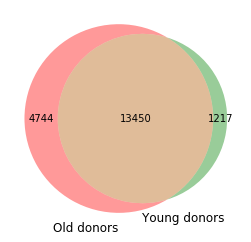

In [49]:
metapeaks({'Young donors': YD_intersection, 'Old donors': OD_intersection})
plt.show()